In [79]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

In [2]:
user = pd.read_excel('user_purchase_data.xlsx', sheet_name='user_registration', index_col=False)
user.sample(15)

,userID,is_subscriber
99438,99439,No
20098,20099,No
152784,152785,No
116618,116619,No
165397,165398,No
119053,119054,No
178139,178140,No
127506,127507,No
175169,175170,No
181172,181173,No


In [3]:
print(f'user.shape: {user.shape}', end='\n')

user.shape: (201217, 2)


In [4]:
user.isna().sum()

userID           0
is_subscriber    0
dtype: int64

In [5]:
user.isnull().sum()

userID           0
is_subscriber    0
dtype: int64

In [6]:
user[user['userID'].duplicated()]

,userID,is_subscriber


In [7]:
round(100 * user['is_subscriber'].value_counts(dropna=False, normalize=True),2)

is_subscriber
No     99.21
Yes     0.79
Name: proportion, dtype: float64

<Axes: xlabel='is_subscriber'>

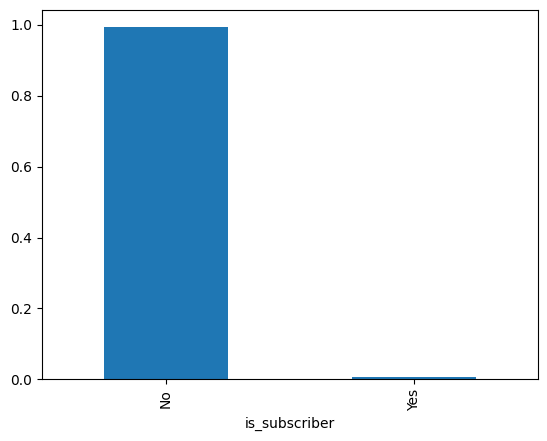

In [8]:
user['is_subscriber'].value_counts(dropna=False, normalize=True).plot(kind='bar')

mobile

In [9]:
mobile = pd.read_excel('user_purchase_data.xlsx', sheet_name='mobile_orders', index_col=False)
user.sample(15)

,userID,is_subscriber
137922,137923,No
38672,38673,No
139648,139649,No
190576,190577,No
142934,142935,No
182447,182448,No
174925,174926,No
143343,143344,No
75882,75883,No
44522,44523,No


In [10]:
mobile.shape


(141690, 2)

In [11]:
mobile.isna().sum()

user_id          0
mobile_orders    0
dtype: int64

In [12]:
mobile[mobile['user_id'].duplicated()]

,user_id,mobile_orders


In [13]:
mobile.dtypes

user_id          int64
mobile_orders    int64
dtype: object

In [14]:
mobile['mobile_orders'].describe()

count    141690.000000
mean          9.565947
std          24.138480
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max        1174.000000
Name: mobile_orders, dtype: float64

<Axes: ylabel='Frequency'>

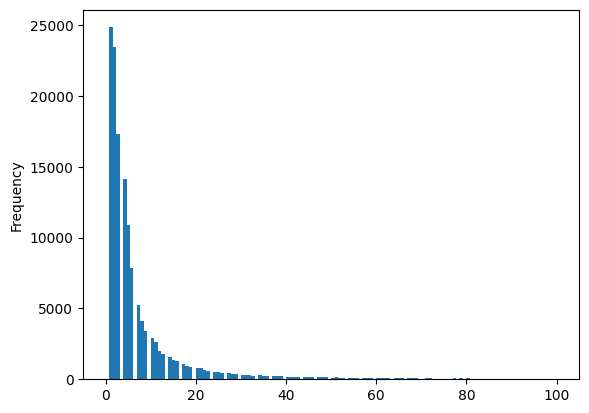

In [15]:
mobile['mobile_orders'].plot(kind='hist', bins=130, range=[0,100])

In [16]:
mobile.loc[~mobile['user_id'].isin(user['userID'])].shape

(1827, 2)

In [17]:
mobile.loc[~mobile['user_id'].isin(user['userID']), 'user_id'].tolist()[:5]

[201218, 201219, 201220, 201221, 201222]

is-store orders

In [18]:
in_store = pd.read_excel('user_purchase_data.xlsx', sheet_name='in_store_orders', index_col=False)
user.sample(15)

,userID,is_subscriber
18705,18706,No
60521,60522,No
121887,121888,No
122951,122952,No
73702,73703,No
154587,154588,No
131493,131494,No
125628,125629,No
60829,60830,No
81653,81654,No


In [19]:
in_store.shape

(53287, 2)

In [20]:
in_store.isna().sum()

user_id            0
in_store_orders    0
dtype: int64

In [21]:
in_store['in_store_orders'].describe()

count    53287.000000
mean        23.849701
std         55.010021
min          1.000000
25%          3.000000
50%          9.000000
75%         24.000000
max       1419.000000
Name: in_store_orders, dtype: float64

<Axes: ylabel='Frequency'>

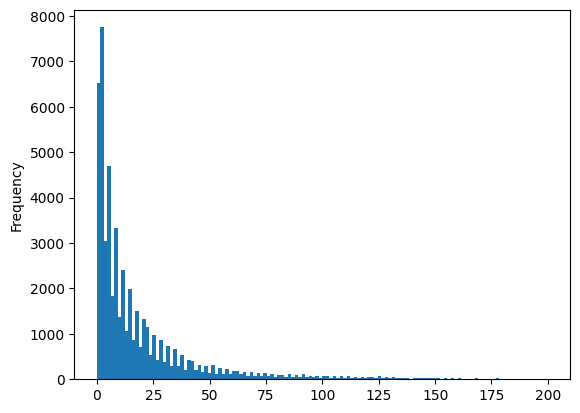

In [22]:
in_store['in_store_orders'].plot(kind='hist', bins=130, range = [0,200])

In [23]:
in_store[in_store['user_id'].isin(user['userID']) == False].shape

(1554, 2)

In [24]:
in_store.loc[~in_store['user_id'].isin(user['userID']), 'user_id'].tolist()[:5]

[203045, 201220, 203046, 203047, 203048]

Dataframe manipulation

In [25]:
user.rename(columns={'userID': 'user_id'},inplace=True)

In [26]:
user['category'] = ['Premium' if i == 'Yes' else 'Free' for i in user['is_subscriber'].values]

In [27]:
user.drop(columns='is_subscriber', inplace=True)

In [28]:
user.category.value_counts()

category
Free       199633
Premium      1584
Name: count, dtype: int64

In [29]:
orders = pd.merge(user, mobile, 
         how='left', 
         left_on='user_id', 
         right_on='user_id').\
            merge(in_store, 
                how='left', 
                on = 'user_id')

In [30]:
orders.isna().sum()

user_id                 0
category                0
mobile_orders       61354
in_store_orders    149484
dtype: int64

In [31]:
orders.fillna(0, inplace=True)

In [32]:
orders.isna().sum()

user_id            0
category           0
mobile_orders      0
in_store_orders    0
dtype: int64

In [33]:
orders.shape

(201217, 4)

In [34]:
orders.dtypes

user_id              int64
category            object
mobile_orders      float64
in_store_orders    float64
dtype: object

In [35]:
orders['total_orders'] = orders['mobile_orders'] + orders['in_store_orders']
orders['total_orders'] = orders['total_orders'].astype(int)
orders.head()

,user_id,category,mobile_orders,in_store_orders,total_orders
0,1,Free,0.0,0.0,0
1,2,Free,5.0,0.0,5
2,3,Free,0.0,0.0,0
3,4,Free,2.0,0.0,2
4,5,Free,5.0,26.0,31


In [36]:
orders.drop(columns=['mobile_orders', 'in_store_orders'], inplace=True)

In [37]:
orders['total_orders'].describe()

count    201217.000000
mean         12.952131
std          46.347289
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        2279.000000
Name: total_orders, dtype: float64

In [38]:
float(100*orders[(orders['category'] == 'Free') & (orders['total_orders'] >= 1)].shape[0] / \
    (orders['category'] == 'Free').sum())

75.16542856141018

In [39]:
cat = 'Free'
min_orders = 50

float(100*orders[(orders['category'] == 'Free') & (orders['total_orders'] >= min_orders)].shape[0] / \
    (orders['category'] == 'Free').sum())

5.285198338951977

In [40]:
order_bins = [0,1,2,3,4,5,6,7,8,9,10,12,13,15,20,25,20,35,40,45,50,55,60,70,80,90,100, 
              120,140,160,180,200,250,300,350,400,450,500,550,600,700,800,900,1000,1100]

In [41]:
for order_bin in order_bins:
    orders['orders >= '+str(order_bin)] = [1 if i >= order_bin else 0 for 
                                           i in orders['total_orders'].values]

orders

,user_id,category,total_orders,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,...,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,1,Free,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Free,5,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Free,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Free,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Free,31,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201212,201213,Free,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201213,201214,Free,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201214,201215,Free,7,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
201215,201216,Free,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
pd.set_option('display.max_columns', None)
orders.head(10)

,user_id,category,total_orders,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 9,orders >= 10,orders >= 12,orders >= 13,orders >= 15,orders >= 20,orders >= 25,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,1,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Free,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Free,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Free,32,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Free,10,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,Free,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,Free,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
totals = orders.drop(columns=['user_id', 'total_orders'])
totals.head()

,category,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 9,orders >= 10,orders >= 12,orders >= 13,orders >= 15,orders >= 20,orders >= 25,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Free,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Free,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Free,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
totals.columns[1:]

Index(['orders >= 0', 'orders >= 1', 'orders >= 2', 'orders >= 3',
       'orders >= 4', 'orders >= 5', 'orders >= 6', 'orders >= 7',
       'orders >= 8', 'orders >= 9', 'orders >= 10', 'orders >= 12',
       'orders >= 13', 'orders >= 15', 'orders >= 20', 'orders >= 25',
       'orders >= 35', 'orders >= 40', 'orders >= 45', 'orders >= 50',
       'orders >= 55', 'orders >= 60', 'orders >= 70', 'orders >= 80',
       'orders >= 90', 'orders >= 100', 'orders >= 120', 'orders >= 140',
       'orders >= 160', 'orders >= 180', 'orders >= 200', 'orders >= 250',
       'orders >= 300', 'orders >= 350', 'orders >= 400', 'orders >= 450',
       'orders >= 500', 'orders >= 550', 'orders >= 600', 'orders >= 700',
       'orders >= 800', 'orders >= 900', 'orders >= 1000', 'orders >= 1100'],
      dtype='object')

In [45]:
totals = totals.groupby('category')[totals.columns[1:]].sum().reset_index()
totals

,category,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 9,orders >= 10,orders >= 12,orders >= 13,orders >= 15,orders >= 20,orders >= 25,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,Free,199633,150055,127507,105052,88675,76665,66874,59841,54505,50176,46510,40463,38133,34116,26777,21938,15787,13669,11960,10551,9377,8452,6985,5922,5125,4442,3432,2761,2226,1805,1497,952,668,501,377,296,242,205,165,118,86,73,60,50
1,Premium,1584,1271,1162,1089,1032,972,915,863,804,773,741,692,672,635,548,489,410,380,362,330,317,307,277,257,227,201,171,153,137,113,105,90,73,58,51,45,43,41,37,29,24,19,12,7


In [46]:
graph_df = pd.melt(totals, id_vars = 'category', value_vars = totals.columns[1:], 
        var_name='orders_bin', value_name='registered_users')
graph_df

,category,orders_bin,registered_users
0,Free,orders >= 0,199633
1,Premium,orders >= 0,1584
2,Free,orders >= 1,150055
3,Premium,orders >= 1,1271
4,Free,orders >= 2,127507
...,...,...,...
83,Premium,orders >= 900,19
84,Free,orders >= 1000,60
85,Premium,orders >= 1000,12
86,Free,orders >= 1100,50


We don't want to compare raw total number of users, so we will show it as a percentage of registered users and for that we need to pickup a baseline number. 


In [47]:
graph_df['minimum_orders'] = [int(i.split(' >= ')[1]) for i in graph_df['orders_bin'].values]
graph_df.drop(columns='orders_bin', inplace=True)
graph_df

,category,registered_users,minimum_orders
0,Free,199633,0
1,Premium,1584,0
2,Free,150055,1
3,Premium,1271,1
4,Free,127507,2
...,...,...,...
83,Premium,19,900
84,Free,60,1000
85,Premium,12,1000
86,Free,50,1100


In [48]:
graph_df.dtypes

category            object
registered_users     int64
minimum_orders       int64
dtype: object

In [49]:
baseline = 0

graph_df['category_totals'] = [graph_df.loc[(graph_df['category'] == i) & 
                                            (graph_df['minimum_orders'] == baseline), 'registered_users'].max()
for i in graph_df['category']]

In [50]:
graph_df['%_registered_users'] = graph_df['registered_users'] / graph_df['category_totals']

In [51]:
graph_df = graph_df.drop(columns=['registered_users', 'category_totals'])

In [52]:
graph_df

,category,minimum_orders,%_registered_users
0,Free,0,1.000000
1,Premium,0,1.000000
2,Free,1,0.751654
3,Premium,1,0.802399
4,Free,2,0.638707
...,...,...,...
83,Premium,900,0.011995
84,Free,1000,0.000301
85,Premium,1000,0.007576
86,Free,1100,0.000250


Data visualization

In [88]:
max_x_val = 200

fig = go.Figure()

for i in pd.unique(graph_df['category']):
    fig.add_trace(go.Scatter(x = graph_df.loc[graph_df['category'] == i, 'minimum_orders'], 
                            y = graph_df.loc[graph_df['category'] == i, '%_registered_users'], 
                         name=f'{i} Users', 
                         hovertemplate='<b>%{y:.2%}</b>'))

fig.update_traces(mode='markers+lines')
fig.update_layout(hovermode = 'x unified', 
                  template='seaborn', 
                  xaxis_title= 'Minimum orders',
                  yaxis_title= f'% of registered users who ordered {baseline}+ times',
                  yaxis= dict(tickformat=".0%"), 
                  title = 'Retention curve of Free Usears vs Premium Users')

fig.update_xaxes(range=[baseline, max_x_val])

fig.show()